In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
surgery = pd.read_csv('C:/Users/CSC/Documents/Dissertation/MSc-Dissertation/data/new_data_ref_dates.csv')

In [3]:
print("Dataset Shape:", surgery.shape)
print("\nFirst few rows:")
surgery.head()

Dataset Shape: (8674, 12)

First few rows:


,HRG,Activity Type,Provider,Local Patient Identifier,LSOA,HRG Description,Fin Year,Fin Month,Start_clock_date,End_clock_date,Priority,Independent Sector
0,BZ31A,Inpatient/Day Case,ANGLIA COMMUNITY EYE SERVICE LTD,62721612,NaN,"Very Major, Cataract or Lens Procedures, with ...",2024/25,9,12/18/2024,12/20/2024,1,Yes
1,BZ31A,Inpatient/Day Case,ANGLIA COMMUNITY EYE SERVICE LTD,51568750,NaN,"Very Major, Cataract or Lens Procedures, with ...",2024/25,9,11/27/2024,12/13/2024,1,Yes
2,BZ31A,Inpatient/Day Case,ANGLIA COMMUNITY EYE SERVICE LTD,63030672,NaN,"Very Major, Cataract or Lens Procedures, with ...",2024/25,11,1/27/2025,2/19/2025,1,Yes
3,BZ31A,Inpatient/Day Case,ANGLIA COMMUNITY EYE SERVICE LTD,62783029,NaN,"Very Major, Cataract or Lens Procedures, with ...",2024/25,10,1/20/2025,1/27/2025,1,Yes
4,BZ31A,Inpatient/Day Case,ANGLIA COMMUNITY EYE SERVICE LTD,62890003,NaN,"Very Major, Cataract or Lens Procedures, with ...",2024/25,9,11/5/2024,12/13/2024,1,Yes


In [4]:
surgery['Start_clock_date'] = pd.to_datetime(surgery['Start_clock_date'])
surgery['End_clock_date'] = pd.to_datetime(surgery['End_clock_date'])

In [5]:
surgery['waiting_time_days'] = (surgery['End_clock_date'] - surgery['Start_clock_date']).dt.days

In [6]:
surgery['is_independent'] = surgery['Independent Sector'] == 'Yes'

In [7]:
print("\nData types after conversion:")
print(surgery.dtypes)


Data types after conversion:
HRG                                 object
Activity Type                       object
Provider                            object
Local Patient Identifier            object
LSOA                                object
HRG Description                     object
Fin Year                            object
Fin Month                            int64
Start_clock_date            datetime64[ns]
End_clock_date              datetime64[ns]
Priority                             int64
Independent Sector                  object
waiting_time_days                    int64
is_independent                        bool
dtype: object


In [8]:
print("\nMissing values:")
print(surgery.isnull().sum())


Missing values:
HRG                            0
Activity Type                  0
Provider                       0
Local Patient Identifier       0
LSOA                        1830
HRG Description                0
Fin Year                       0
Fin Month                      0
Start_clock_date               0
End_clock_date                 0
Priority                       0
Independent Sector             0
waiting_time_days              0
is_independent                 0
dtype: int64


In [9]:
negative_waits = surgery[surgery['waiting_time_days'] < 0]
print(f"\nRecords with negative waiting times: {len(negative_waits)}")


Records with negative waiting times: 1


In [10]:
print("\nWaiting time statistics by Priority:")
waiting_stats = surgery.groupby('Priority')['waiting_time_days'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(waiting_stats)


Waiting time statistics by Priority:
          count        mean  median         std  min   max
Priority                                                  
1          8438  106.442759    49.0  136.702716   -3  5536
2           232  140.241379   131.0   95.293315    0   461
3             4   55.500000    52.0   14.456832   42    76


In [11]:
print("\nNumber of procedures by Provider:")
provider_counts = surgery['Provider'].value_counts()
print(provider_counts)


Number of procedures by Provider:
Provider
NORTH WEST ANGLIA NHS FOUNDATION TRUST                            2220
CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION TRUST               2014
ANGLIA COMMUNITY EYE SERVICE LTD                                  1793
SPAMEDICA PETERBOROUGH                                            1777
SPAMEDICA BEDFORD                                                  468
FITZWILLIAM HOSPITAL                                               152
COMMUNITY HEALTH AND EYECARE LIMITED                                42
NEWMEDICA SUFFOLK - BURY ST EDMUNDS - CLARITY HOUSE                 33
WEST SUFFOLK NHS FOUNDATION TRUST                                   27
SPAMEDICA CHELMSFORD                                                26
SPAMEDICA CAMBRIDGE                                                 24
NEWMEDICA - IPSWICH                                                 16
MOORFIELDS EYE HOSPITAL NHS FOUNDATION TRUST                        13
SPAMEDICA LUTON                  

In [12]:
print("\nActivity Type distribution:")
activity_distribution = surgery['Activity Type'].value_counts()
print(activity_distribution)


Activity Type distribution:
Activity Type
Inpatient/Day Case      7802
Outpatient Procedure     872
Name: count, dtype: int64


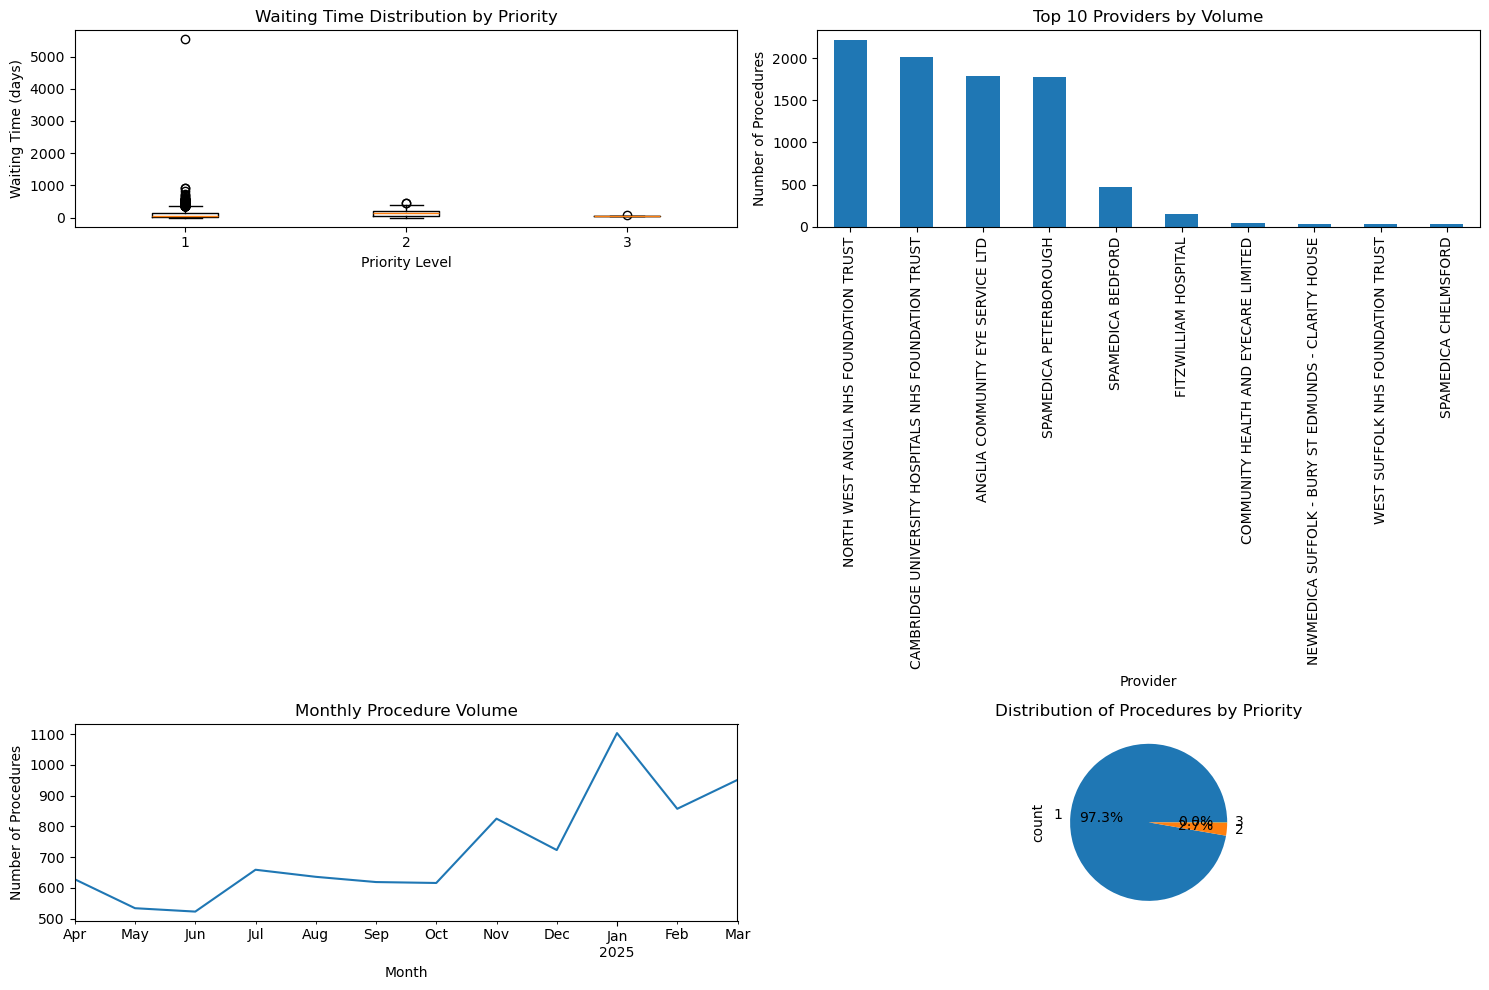

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Waiting time distribution by priority
axes[0, 0].boxplot([surgery[surgery['Priority'] == p]['waiting_time_days'].dropna() 
                    for p in sorted(surgery['Priority'].unique())],
                   labels=sorted(surgery['Priority'].unique()))
axes[0, 0].set_title('Waiting Time Distribution by Priority')
axes[0, 0].set_xlabel('Priority Level')
axes[0, 0].set_ylabel('Waiting Time (days)')

# Provider volume
provider_counts.head(10).plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Providers by Volume')
axes[0, 1].set_xlabel('Provider')
axes[0, 1].set_ylabel('Number of Procedures')

# Monthly volume trends
surgery['month_year'] = surgery['End_clock_date'].dt.to_period('M')
monthly_volume = surgery.groupby('month_year').size()
monthly_volume.plot(ax=axes[1, 0])
axes[1, 0].set_title('Monthly Procedure Volume')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Number of Procedures')

# Priority distribution
priority_dist = surgery['Priority'].value_counts().sort_index()
priority_dist.plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%')
axes[1, 1].set_title('Distribution of Procedures by Priority')

plt.tight_layout()
plt.show()


In [14]:
print("\n=== Data Cleaning Recommendations ===")
print(f"1. Handle {len(negative_waits)} records with negative waiting times")
print(f"2. Address {surgery['LSOA'].isnull().sum()} missing LSOA values")
print(f"3. Consider removing outliers in waiting times (e.g., > 365 days)")


=== Data Cleaning Recommendations ===
1. Handle 1 records with negative waiting times
2. Address 1830 missing LSOA values
3. Consider removing outliers in waiting times (e.g., > 365 days)


In [15]:
outlier_threshold = 365  # days
outliers = surgery[surgery['waiting_time_days'] > outlier_threshold]
print(f"4. Found {len(outliers)} records with waiting time > {outlier_threshold} days")

4. Found 497 records with waiting time > 365 days


In [16]:
surgery_clean = surgery[surgery['waiting_time_days'] >= 0].copy()
print(f"\nRemoved {len(surgery) - len(surgery_clean)} records with negative waiting times")


Removed 1 records with negative waiting times


In [17]:
provider_analysis = []

for provider in surgery_clean['Provider'].unique():
    provider_data = surgery_clean[surgery_clean['Provider'] == provider].copy()
    provider_data = provider_data.sort_values('Start_clock_date')
    
    # Calculate inter-arrival times (in days)
    provider_data['inter_arrival_days'] = provider_data['Start_clock_date'].diff().dt.days
    
    # Remove first row (NaN) and zeros
    inter_arrivals = provider_data['inter_arrival_days'].dropna()
    inter_arrivals = inter_arrivals[inter_arrivals > 0]
    
    # Calculate statistics
    if len(inter_arrivals) > 0:
        provider_stats = {
            'Provider': provider,
            'Total_Procedures': len(provider_data),
            'Mean_Inter_Arrival_Days': inter_arrivals.mean(),
            'Mean_Waiting_Days': provider_data['waiting_time_days'].mean(),
            'Median_Waiting_Days': provider_data['waiting_time_days'].median(),
            'Std_Waiting_Days': provider_data['waiting_time_days'].std(),
            'Arrival_Rate_Per_Day': 1 / inter_arrivals.mean() if inter_arrivals.mean() > 0 else 0,
            'Service_Rate_Per_Day': 1 / provider_data['waiting_time_days'].mean() if provider_data['waiting_time_days'].mean() > 0 else 0
        }
        provider_analysis.append(provider_stats)

provider_df = pd.DataFrame(provider_analysis)
provider_df = provider_df.sort_values('Total_Procedures', ascending=False)

print("\n=== Provider Analysis for M/M/c Model ===")
print(provider_df.head(10))


=== Provider Analysis for M/M/c Model ===
                                             Provider  Total_Procedures  \
7              NORTH WEST ANGLIA NHS FOUNDATION TRUST              2219   
1   CAMBRIDGE UNIVERSITY HOSPITALS NHS FOUNDATION ...              2014   
0                    ANGLIA COMMUNITY EYE SERVICE LTD              1793   
18                             SPAMEDICA PETERBOROUGH              1777   
12                                  SPAMEDICA BEDFORD               468   
4                                FITZWILLIAM HOSPITAL               152   
2                COMMUNITY HEALTH AND EYECARE LIMITED                42   
6   NEWMEDICA SUFFOLK - BURY ST EDMUNDS - CLARITY ...                33   
20                  WEST SUFFOLK NHS FOUNDATION TRUST                27   
14                               SPAMEDICA CHELMSFORD                26   

    Mean_Inter_Arrival_Days  Mean_Waiting_Days  Median_Waiting_Days  \
7                  9.243902         190.275800              

In [18]:
total_arrivals = len(surgery_clean)
date_range = (surgery_clean['Start_clock_date'].max() - surgery_clean['Start_clock_date'].min()).days

system_arrival_rate = total_arrivals / date_range
system_mean_service_time = surgery_clean['waiting_time_days'].mean()
system_service_rate = 1 / system_mean_service_time

print("\n=== System-Wide Parameters ===")
print(f"Total procedures: {total_arrivals}")
print(f"Date range: {date_range} days")
print(f"System arrival rate (λ): {system_arrival_rate:.4f} patients/day")
print(f"System mean service time: {system_mean_service_time:.2f} days")
print(f"System service rate (μ): {system_service_rate:.4f} patients/day")



=== System-Wide Parameters ===
Total procedures: 8673
Date range: 5693 days
System arrival rate (λ): 1.5234 patients/day
System mean service time: 107.34 days
System service rate (μ): 0.0093 patients/day


In [19]:
priority_analysis = []

for priority in sorted(surgery_clean['Priority'].unique()):
    priority_data = surgery_clean[surgery_clean['Priority'] == priority]
    
    priority_stats = {
        'Priority': priority,
        'Count': len(priority_data),
        'Percentage': len(priority_data) / len(surgery_clean) * 100,
        'Mean_Waiting_Days': priority_data['waiting_time_days'].mean(),
        'Median_Waiting_Days': priority_data['waiting_time_days'].median(),
        'Max_Waiting_Days': priority_data['waiting_time_days'].max()
    }
    priority_analysis.append(priority_stats)

priority_df = pd.DataFrame(priority_analysis)
print("\n=== Priority-Based Analysis ===")
print(priority_df)


=== Priority-Based Analysis ===
   Priority  Count  Percentage  Mean_Waiting_Days  Median_Waiting_Days  \
0         1   8437   97.278912         106.455731                 49.0   
1         2    232    2.674968         140.241379                131.0   
2         3      4    0.046120          55.500000                 52.0   

   Max_Waiting_Days  
0              5536  
1               461  
2                76  


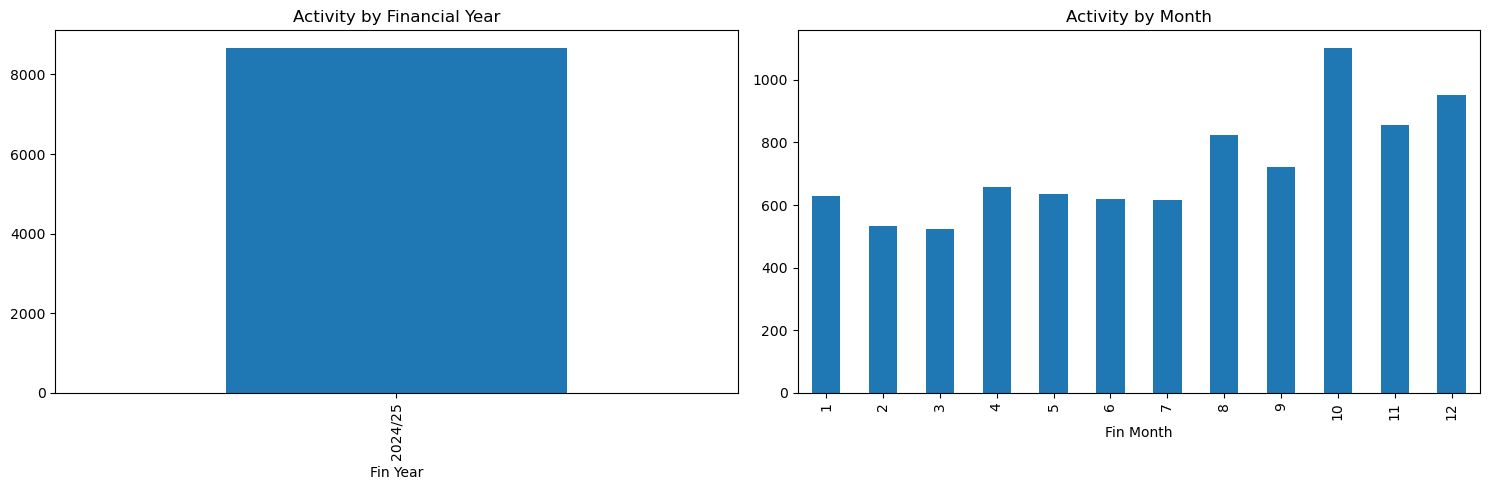

In [20]:
yearly_activity = surgery.groupby('Fin Year').size()
monthly_activity = surgery.groupby('Fin Month').size()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
yearly_activity.plot(kind='bar', ax=ax1, title='Activity by Financial Year')
monthly_activity.plot(kind='bar', ax=ax2, title='Activity by Month')
plt.tight_layout()
plt.show()

In [21]:
hrg_counts = surgery['HRG'].value_counts()
print(f"Number of unique HRGs: {surgery['HRG'].nunique()}")
print("Top 10 most common procedures:")
top_hrgs = surgery.groupby(['HRG', 'HRG Description']).size().sort_values(ascending=False)
print(top_hrgs)

Number of unique HRGs: 10
Top 10 most common procedures:
HRG    HRG Description                                                            
BZ34C  Phacoemulsification Cataract Extraction and Lens Implant, with CC Score 0-1    3276
BZ34B  Phacoemulsification Cataract Extraction and Lens Implant, with CC Score 2-3    2680
BZ33Z  Minor, Cataract or Lens Procedures                                              866
BZ34A  Phacoemulsification Cataract Extraction and Lens Implant, with CC Score 4+      741
BZ31A  Very Major, Cataract or Lens Procedures, with CC Score 2+                       501
BZ31B  Very Major, Cataract or Lens Procedures, with CC Score 0-1                      475
BZ30A  Complex, Cataract or Lens Procedures, with CC Score 2+                           62
BZ30B  Complex, Cataract or Lens Procedures, with CC Score 0-1                          49
BZ32B  Intermediate, Cataract or Lens Procedures, with CC Score 0-1                     22
BZ32A  Intermediate, Cataract or Lens Pro

In [22]:
# Activity volume by provider
provider_activity = surgery.groupby('Provider').agg({
    'Local Patient Identifier': 'count',
    'HRG': 'nunique',
    'Activity Type': lambda x: x.value_counts().index[0]  # Most common activity type
}).rename(columns={
    'Local Patient Identifier': 'Total_Activities',
    'HRG': 'Unique_Procedures',
    'Activity Type': 'Primary_Activity_Type'
})

print("Provider performance summary:")
print(provider_activity.describe())

Provider performance summary:
       Total_Activities  Unique_Procedures
count         31.000000          31.000000
mean         279.806452           3.451613
std          662.774191           2.566953
min            1.000000           1.000000
25%            1.000000           1.000000
50%           11.000000           3.000000
75%           30.000000           5.000000
max         2220.000000          10.000000


<Figure size 1500x800 with 0 Axes>

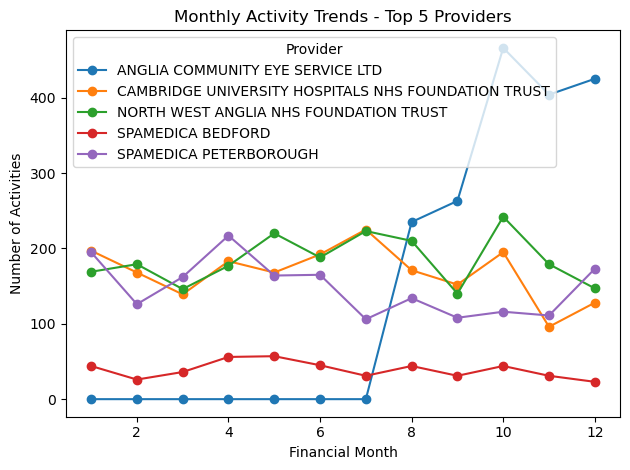

In [23]:
# Monthly activity trends by top providers
top_providers = surgery['Provider'].value_counts().head(5).index
monthly_provider = surgery[surgery['Provider'].isin(top_providers)].groupby(['Fin Month', 'Provider']).size().unstack(fill_value=0)

plt.figure(figsize=(15, 8))
monthly_provider.plot(kind='line', marker='o')
plt.title('Monthly Activity Trends - Top 5 Providers')
plt.xlabel('Financial Month')
plt.ylabel('Number of Activities')
plt.tight_layout()
plt.show()

In [25]:
surgery_final = surgery_clean.copy()

In [26]:
# Simply flag long waits for analytical purposes (but keep all data)
surgery_final['long_wait_flag'] = surgery_final['waiting_time_days'] > 365
surgery_final['very_long_wait_flag'] = surgery_final['waiting_time_days'] > 730

print(f"Records with waits > 365 days: {surgery_final['long_wait_flag'].sum()}")
print(f"Records with waits > 730 days: {surgery_final['very_long_wait_flag'].sum()}")
print(f"Maximum waiting time: {surgery_final['waiting_time_days'].max()} days")
print("✅ All waiting times preserved - no data capped or removed")

Records with waits > 365 days: 497
Records with waits > 730 days: 4
Maximum waiting time: 5536 days
✅ All waiting times preserved - no data capped or removed


In [27]:
# 2. Create additional useful variables for modeling
surgery_final['month_year'] = surgery_final['End_clock_date'].dt.to_period('M').astype(str)
surgery_final['quarter'] = surgery_final['End_clock_date'].dt.quarter
surgery_final['day_of_week'] = surgery_final['End_clock_date'].dt.day_name()

In [28]:
# 3. Standardize provider names (remove extra spaces, standardize case)
surgery_final['Provider_Clean'] = surgery_final['Provider'].str.strip().str.upper()

In [29]:
# 4. Create provider size categories for analysis
provider_volumes = surgery_final['Provider'].value_counts()
surgery_final['Provider_Size'] = surgery_final['Provider'].map(
    lambda x: 'Large' if provider_volumes[x] > 500 else 
              'Medium' if provider_volumes[x] > 100 else 'Small')

In [30]:
# 5. Validate data integrity before export
print("\n=== FINAL DATA VALIDATION ===")
print(f"Total records: {len(surgery_final)}")
print(f"Date range: {surgery_final['Start_clock_date'].min()} to {surgery_final['End_clock_date'].max()}")
print(f"Unique providers: {surgery_final['Provider'].nunique()}")
print(f"Unique procedures (HRG): {surgery_final['HRG'].nunique()}")
print(f"Priority distribution:\n{surgery_final['Priority'].value_counts().sort_index()}")


=== FINAL DATA VALIDATION ===
Total records: 8673
Date range: 2009-08-26 00:00:00 to 2025-03-31 00:00:00
Unique providers: 31
Unique procedures (HRG): 10
Priority distribution:
Priority
1    8437
2     232
3       4
Name: count, dtype: int64


In [31]:
# Check for any remaining data quality issues
print(f"\nRemaining missing values:")
print(surgery_final.isnull().sum()[surgery_final.isnull().sum() > 0])


Remaining missing values:
LSOA    1830
dtype: int64


In [32]:
# Verify M/M/c parameters are reasonable
print(f"\nSystem utilization (λ/μ): {1.5234/0.0093:.2f}")
print("Note: High utilization reflects NHS capacity constraints - important for modeling")


System utilization (λ/μ): 163.81
Note: High utilization reflects NHS capacity constraints - important for modeling


In [33]:
# Long waiting times are valuable for:
print("\n=== Why Long Waits Matter ===")
print("• Represent real patient experiences")
print("• Critical for equity analysis") 
print("• Essential for capacity planning")
print("• Show true system performance under stress")


=== Why Long Waits Matter ===
• Represent real patient experiences
• Critical for equity analysis
• Essential for capacity planning
• Show true system performance under stress


In [34]:
# 6. Select final columns for export (keeping all waiting time data)
final_columns = [
    'HRG', 'Activity Type', 'Provider', 'Provider_Clean', 'Provider_Size',
    'Local Patient Identifier', 'LSOA', 'HRG Description', 
    'Fin Year', 'Fin Month', 'quarter', 'month_year', 'day_of_week',
    'Start_clock_date', 'End_clock_date', 'Priority',
    'Independent Sector', 'is_independent',
    'waiting_time_days', 'long_wait_flag', 'very_long_wait_flag'
]

surgery_export = surgery_final[final_columns].copy()

In [35]:
print(f"\n=== READY FOR EXPORT ===")
print(f"Final dataset shape: {surgery_export.shape}")
print(f"Columns: {list(surgery_export.columns)}")

# Export to CSV
surgery_export.to_csv('surgery_data_cleaned_for_modeling.csv', index=False)
print("✅ Data exported to 'surgery_data_cleaned_for_modeling.csv'")

# Also export provider-level statistics for M/M/c modeling
provider_df.to_csv('provider_statistics_mmc_model.csv', index=False)
print("✅ Provider statistics exported to 'provider_statistics_mmc_model.csv'")

# Export priority analysis
priority_df.to_csv('priority_analysis.csv', index=False)
print("✅ Priority analysis exported to 'priority_analysis.csv'")


=== READY FOR EXPORT ===
Final dataset shape: (8673, 21)
Columns: ['HRG', 'Activity Type', 'Provider', 'Provider_Clean', 'Provider_Size', 'Local Patient Identifier', 'LSOA', 'HRG Description', 'Fin Year', 'Fin Month', 'quarter', 'month_year', 'day_of_week', 'Start_clock_date', 'End_clock_date', 'Priority', 'Independent Sector', 'is_independent', 'waiting_time_days', 'long_wait_flag', 'very_long_wait_flag']
✅ Data exported to 'surgery_data_cleaned_for_modeling.csv'
✅ Provider statistics exported to 'provider_statistics_mmc_model.csv'
✅ Priority analysis exported to 'priority_analysis.csv'
